# <span style="color:#DD3E02 "> <center> Fitbit </center> </span>

<div style="width:100%;text-align: center;"> 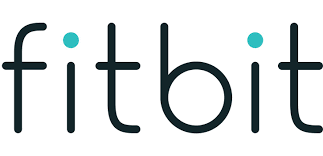 </div>




# <span style="color:#DD3E02"> 1. Summary </span> <a class="anchor" id="summary_1"></a>
The FitBit Fitness Tracker App analysis project involved examining data from 18 different sources, including daily activity, calories, hourly steps, etc., collected through a distributed survey. After cleaning and merging the datasets, the analysis focused on identifying trends in daily and hourly activity, minute-level patterns, sleep data, weight logs, and heart rate variations. Utilizing visualizations such as Pandas Profiling, histograms, and scatter plots, the project aimed to provide actionable insights for the marketing team, including potential app feature improvements and correlations between different metrics. The tools used included Python for data processing and visualization, with Pandas Profiling for comprehensive data exploration.

# <span style="color:#DD3E02">  2. Ask Phase </span>  <a class="anchor" id="ask_phase_2"></a>

#### 2.1 Business Task <a class="anchor" id="business_task_2_1"></a>
Business Task:
Analyze FitBit Fitness Tracker App data to gain insights into how consumers are using the FitBit app and discover trends and insights for the marketing team.

Business Objectives:


● What are the trends identified?


● How could these trends apply to customers?


● How could these trends help influence marketing strategy?

***

# <span style="color:#DD3E02"> 3. Prepare Phase </span> <a class="anchor" id="prepare_phase_3"></a>


In the Prepare phase of the FitBit Fitness Tracker App analysis project, the focus was on setting the groundwork for robust data exploration and analysis. This phase involved:

1. **Data Collection:**
   Collected data from 18 different files, encompassing various aspects of FitBit app usage, through a distributed survey on Amazon Mechanical Turk. These files included information on daily and hourly activity, calories, sleep, weight logs, and heart rate.

2. **Data Cleaning and Preprocessing:**
   Conducted thorough data cleaning to address issues such as missing values, outliers, and inconsistencies. Merged relevant datasets to create a consolidated and comprehensive dataset for analysis. Extracted meaningful features from timestamp data to enhance the analysis.

3. **Data Profiling:**
   Leveraged Pandas Profiling to generate comprehensive data profiles, gaining insights into data distributions, correlations, and potential issues. This step helped in understanding the structure and characteristics of the dataset.

4. **Feature Engineering:**
   Derived new features or transformed existing ones to enhance the dataset's informativeness for subsequent analysis. This included extracting relevant information from timestamps and creating aggregated metrics.

5. **Data Validation:**
   Ensured the integrity and consistency of the dataset through validation checks. Verified that the data aligned with the expected patterns and distributions, addressing any anomalies that could impact the analysis.

The Prepare phase laid a solid foundation, ensuring that the dataset was cleaned, organized, and enriched for the subsequent exploration and analysis stages. The goal was to set the stage for meaningful insights and actionable recommendations in the upcoming phases of the project.

### 4.1 Importing the required libraries <a class="anchor" id="installing_packages_and_opening_libraries_4_1"></a>
Firstly, The following libraries below will be imported for our analysis.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 4.2 Importing and previewing the dataframes <a class="anchor" id="importing_datasets_4_2"></a>

In [ ]:
# Loading the data into the pandas data frame.
daily_activity = pd.read_csv("/dailyActivity_merged.csv")
hourly_calories = pd.read_csv("/hourlyCalories_merged.csv")
hourly_intensities = pd.read_csv("/hourlyIntensities_merged.csv")
hourly_steps = pd.read_csv("/hourlySteps_merged.csv")
sleep_day = pd.read_csv("/sleepDay_merged.csv")

# Displaying the top 5 rows of each dataset
print('\033[1m' + 'daily_activity' + '\033[0m')
display(daily_activity.head(5))

print('\033[1m' + 'hourly_calories' + '\033[0m')
display(hourly_calories.head(5))

print('\033[1m' + 'hourly_intensities' + '\033[0m')
display(hourly_intensities.head(5))

print('\033[1m' + 'hourly_steps' + '\033[0m')
display(hourly_steps.head(5))

print('\033[1m' + 'sleep_day' + '\033[0m')
display(sleep_day.head(5))

daily_activity


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


hourly_calories


,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


hourly_intensities


,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


hourly_steps


,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


sleep_day


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 4.3 Checking the data information <a class="anchor" id="cleaning_and_formatting_4_4"></a>
Now we will get an overview (number of entries, null values, column names) of the dataframes and check for any incorrect data types.

In [ ]:
print('\033[1m' + 'daily_activity' + '\033[0m') #Bolded title
daily_activity.info()

daily_activity
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  


In [ ]:
print('\033[1m' + 'hourly_calories' + '\033[0m') #Bolded title
hourly_calories.info()

hourly_calories
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [ ]:
print('\033[1m' + 'hourly_intensities' + '\033[0m') #Bolded title
hourly_intensities.info()

hourly_intensities
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [ ]:
print('\033[1m' + 'hourly_steps' + '\033[0m') #Bolded title
hourly_steps.info()

hourly_steps
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [ ]:
print('\033[1m' + 'sleep_day' + '\033[0m') #Bolded title
sleep_day.info()

sleep_day
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


Notice that the data types of the `ActivityDate`, `ActivityHour`, and `SleepDay` columns are in the object format. We will convert them to the date-time format later on (Section 4.4.3).

### 4.4 Data cleaning and Transformation
We will begin the data cleaning and transformation process. This involves:

* Identifying and removing duplicates and nulls
* Formatting datatypes
* Renaming columns
* Sorting

#### 4.4.1 Identifying and dropping duplicates




In [ ]:
# Number of duplicates in each dataframe
duplicates_daily_activity = print("daily_activity=",daily_activity.duplicated().sum())

duplicates_hourly_calories = print("hourly_calories=",hourly_calories.duplicated().sum())

duplicates_hourly_intensities = print("hourly_intensities=",hourly_intensities.duplicated().sum())

duplicates_hourly_steps = print("hourly_steps=",hourly_steps.duplicated().sum())

duplicates_sleep_day= print("sleep_activity=",sleep_day.duplicated().sum())

daily_activity= 0
hourly_calories= 0
hourly_intensities= 0
hourly_steps= 0
sleep_activity= 3


Found 3 duplicates in the `sleep_activity` dataframe.

In [ ]:
# Extracting the duplicated rows in sleep_day dataframe
sleep_day.loc[sleep_day.duplicated(), :]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
161,4388161847,5/5/2016 12:00:00 AM,1,471,495
223,4702921684,5/7/2016 12:00:00 AM,1,520,543
380,8378563200,4/25/2016 12:00:00 AM,1,388,402


In [ ]:
#Dropping the duplicates
sleep_day.drop_duplicates()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


Note that we started out at 413 entries (Refer to Section 4.3) in this dataframe, now it is at 410 entries after removing the 3 duplicates.

#### 4.4.2 Identifying and dropping nulls
Here we found no nulls within the dataframes, thus the removal of nulls is not needed.

In [ ]:
# Total number of missing values
print("daily_activity =", daily_activity.isnull().sum().sum())
print("hourly_calories =", hourly_calories.isnull().sum().sum())
print("hourly_intensities =", hourly_intensities.isnull().sum().sum())
print("hourly_steps =", hourly_steps.isnull().sum().sum())
print("sleep_activity =", sleep_day.isnull().sum().sum())

daily_activity = 0
hourly_calories = 0
hourly_intensities = 0
hourly_steps = 0
sleep_activity = 0


#### 4.4.3 Renaming columns and formatting datatypes
As identified in Section 4.3, the timestamp columns of the respective dataframes are in the 'object' format. We would want to convert them into the 'date-time'format and display the dates in "yyyy-mm-dd". The `Date` and `Time` columns of the `sleep_day` dataframe will be split to merge with the `daily_activity` dataframe later.

In [ ]:
# Convert to date-time format
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])\

hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])

hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'])

hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

sleep_day['Date'] = pd.to_datetime(sleep_day['SleepDay'])
sleep_day['Time'] = pd.to_datetime(sleep_day['SleepDay']).dt.time

# Separating columns into Date and Time
sleep_day = sleep_day[['Id','Date','Time','TotalSleepRecords','TotalMinutesAsleep','TotalTimeInBed']]

In the `daily_activity` dataframe, we will rename the `ActivityDate` column and add a `DayOfWeek` Column to better structure and analyse the data.

In [ ]:
# Rename ActivityDate column
daily_activity = daily_activity.rename(columns={'ActivityDate': 'Date'})

In [ ]:
#Adding DayOfWeek Column
daily_activity['DayOfWeek'] = pd.to_datetime(daily_activity['Date']).dt.day_name()

#Shifting DayOfWeek column to the second index of the dataframe
DayOfWeek = daily_activity['DayOfWeek']
daily_activity = daily_activity.drop(columns=['DayOfWeek'])
daily_activity.insert(loc=2, column='DayOfWeek', value=DayOfWeek)

Lets take a look at the transformed dataframes.

In [ ]:
print('\033[1m' + 'daily_activity' + '\033[0m')
display(daily_activity.head(5))

print('\033[1m' + 'hourly_calories' + '\033[0m')
display(hourly_calories.head(5))

print('\033[1m' + 'hourly_intensities' + '\033[0m')
display(hourly_intensities.head(5))

print('\033[1m' + 'hourly_steps' + '\033[0m')
display(hourly_steps.head(5))

print('\033[1m' + 'sleep_day' + '\033[0m')
display(sleep_day.head(5))

daily_activity


,Id,Date,DayOfWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


hourly_calories


,Id,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


hourly_intensities


,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,20,0.333333
1,1503960366,2016-04-12 01:00:00,8,0.133333
2,1503960366,2016-04-12 02:00:00,7,0.116667
3,1503960366,2016-04-12 03:00:00,0,0.000000
4,1503960366,2016-04-12 04:00:00,0,0.000000


hourly_steps


,Id,ActivityHour,StepTotal
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151
3,1503960366,2016-04-12 03:00:00,0
4,1503960366,2016-04-12 04:00:00,0


sleep_day


,Id,Date,Time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,00:00:00,1,327,346
1,1503960366,2016-04-13,00:00:00,2,384,407
2,1503960366,2016-04-15,00:00:00,1,412,442
3,1503960366,2016-04-16,00:00:00,2,340,367
4,1503960366,2016-04-17,00:00:00,1,700,712


### 4.5 Merging dataframes
As part of the transformation process, we will merge the `daily_activity` and `sleep_day` dataframes with the `Id` and `Date` column as the primary keys.

In [ ]:
daily_activity_sleep = daily_activity.merge(sleep_day,on=['Id','Date'],how='left')

display(daily_activity_sleep)

,Id,Date,DayOfWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,Tuesday,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,00:00:00,1.0,327.0,346.0
1,1503960366,2016-04-13,Wednesday,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,00:00:00,2.0,384.0,407.0
2,1503960366,2016-04-14,Thursday,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,Friday,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,00:00:00,1.0,412.0,442.0
4,1503960366,2016-04-16,Saturday,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,00:00:00,2.0,340.0,367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2016-05-08,Sunday,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,NaN,NaN,NaN,NaN
939,8877689391,2016-05-09,Monday,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,NaN,NaN,NaN,NaN
940,8877689391,2016-05-10,Tuesday,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,NaN,NaN,NaN,NaN
941,8877689391,2016-05-11,Wednesday,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,NaN,NaN,NaN,NaN


We will also merge the `hourly_(Calories, Intensities, Steps)` dataframes using the `Id` and `ActivityHour` columns as primary keys to form a new dataframe.

In [ ]:
#Merge hourly dataframes
hourly_metrics = hourly_calories.merge(hourly_intensities,on=['Id','ActivityHour'],how='left')\
.merge(hourly_steps,on=['Id','ActivityHour'],how='left')

#Rename columns
hourly_metrics = hourly_metrics.rename(columns={'ActivityHour': 'DateTime'})
hourly_metrics = hourly_metrics.rename(columns={'StepTotal': 'TotalSteps'})

display(hourly_metrics)

,Id,DateTime,Calories,TotalIntensity,AverageIntensity,TotalSteps
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0
...,...,...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,126,12,0.200000,514
22095,8877689391,2016-05-12 11:00:00,192,29,0.483333,1407
22096,8877689391,2016-05-12 12:00:00,321,93,1.550000,3135
22097,8877689391,2016-05-12 13:00:00,101,6,0.100000,307


***

# <span style="color:#DD3E02"> 5. Analyze and Share Phase </span>

### 5.1 Summary Statistics
This function provides an holistic overview of the dataframes to draw insights for analysis.

In [ ]:
#Exclude Id column
cols = set(daily_activity_sleep.columns) - {'Id'}
summary_daily_activity = daily_activity_sleep[list(cols)]

summary_daily_activity.describe()

,TotalTimeInBed,VeryActiveMinutes,LightlyActiveMinutes,ModeratelyActiveDistance,FairlyActiveMinutes,TotalSteps,TotalSleepRecords,SedentaryMinutes,Calories,LoggedActivitiesDistance,TotalMinutesAsleep,SedentaryActiveDistance,TotalDistance,LightActiveDistance,TrackerDistance,VeryActiveDistance
count,413.000000,943.000000,943.000000,943.000000,943.000000,943.000000,413.000000,943.000000,943.000000,943.000000,413.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,458.639225,21.239661,193.025451,0.570880,13.628844,7652.188759,1.118644,990.353128,2307.507953,0.110045,419.467312,0.001601,5.502853,3.349258,5.488547,1.504316
std,127.101607,32.946264,109.308468,0.884775,20.000746,5086.532832,0.345521,301.262473,720.815522,0.622292,118.344679,0.007335,3.926509,2.046505,3.909291,2.657626
min,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,403.000000,0.000000,127.000000,0.000000,0.000000,3795.000000,1.000000,729.000000,1829.500000,0.000000,361.000000,0.000000,2.620000,1.950000,2.620000,0.000000
50%,463.000000,4.000000,199.000000,0.240000,7.000000,7439.000000,1.000000,1057.000000,2140.000000,0.000000,433.000000,0.000000,5.260000,3.380000,5.260000,0.220000
75%,526.000000,32.000000,264.000000,0.805000,19.000000,10734.000000,1.000000,1229.000000,2796.500000,0.000000,490.000000,0.000000,7.720000,4.790000,7.715000,2.065000
max,961.000000,210.000000,518.000000,6.480000,143.000000,36019.000000,3.000000,1440.000000,4900.000000,4.942142,796.000000,0.110000,28.030001,10.710000,28.030001,21.920000


In [ ]:
#Exclude Id column
cols = set(hourly_metrics.columns) - {'Id'}
summary_hourly_metrics = hourly_metrics[list(cols)]

summary_hourly_metrics.describe()

,AverageIntensity,Calories,TotalSteps,TotalIntensity
count,22099.000000,22099.000000,22099.000000,22099.000000
mean,0.200589,97.386760,320.166342,12.035341
std,0.352219,60.702622,690.384228,21.133110
min,0.000000,42.000000,0.000000,0.000000
25%,0.000000,63.000000,0.000000,0.000000
50%,0.050000,83.000000,40.000000,3.000000
75%,0.266667,108.000000,357.000000,16.000000
max,3.000000,948.000000,10554.000000,180.000000


### 5.2 Distribution of the different activity levels
Now we will create a distribution of the different activity levels by minutes. They are categorize by:

* Lightly Active Minutes
* Fairly Active Minutes
* Fairly Active Minutes

<ipython-input-40-485f3f8b4901>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


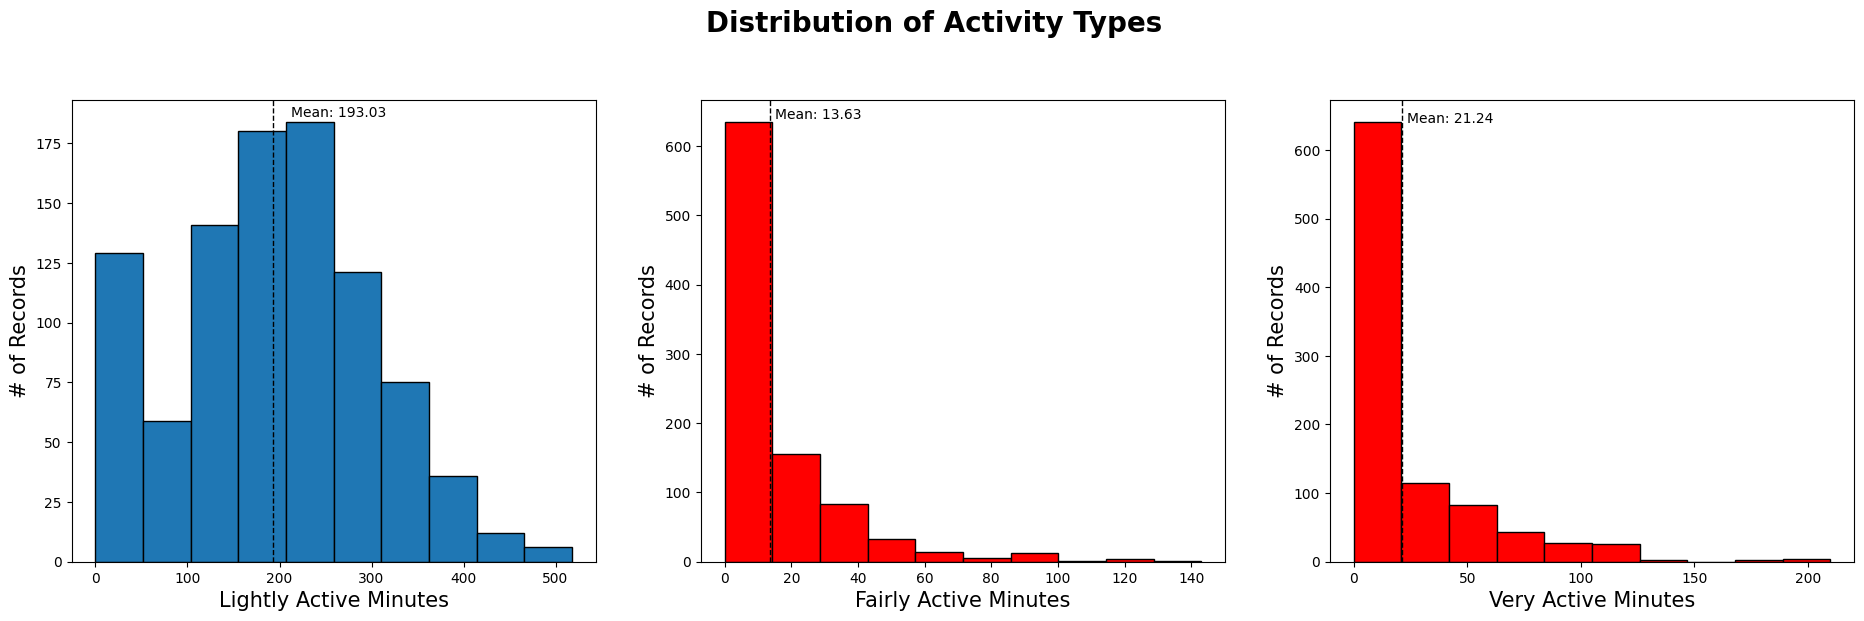

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(23, 6))

plt.style.use("seaborn-colorblind")

fig.suptitle("Distribution of Activity Types", fontsize=20, fontweight="bold", y="1.03")

min_ylim, max_ylim = plt.ylim()

# Plot Histogram for Lightly Active Minutes
ax[0].hist(daily_activity_sleep["LightlyActiveMinutes"], histtype="bar", bins=10, edgecolor='k')
ax[0].set_xlabel("Lightly Active Minutes", fontsize=15)
ax[0].set_ylabel("# of Records", fontsize=15)
ax[0].axvline(daily_activity_sleep["LightlyActiveMinutes"].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0].text(daily_activity_sleep["LightlyActiveMinutes"].mean()*1.1, max_ylim*186, 'Mean: {:.2f}'.format(daily_activity_sleep["LightlyActiveMinutes"].mean()))

# Plot Histogram for Fairly Active Minutes
ax[1].hist(daily_activity_sleep["FairlyActiveMinutes"], histtype="bar", color="r", bins=10, edgecolor='k')
ax[1].set_xlabel("Fairly Active Minutes", fontsize=15)
ax[1].set_ylabel("# of Records", fontsize=15)
ax[1].axvline(daily_activity_sleep["FairlyActiveMinutes"].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1].text(daily_activity_sleep["FairlyActiveMinutes"].mean()*1.1, max_ylim*640, 'Mean: {:.2f}'.format(daily_activity_sleep["FairlyActiveMinutes"].mean()))


# Plot Histogram for Very Active Minutes
ax[2].hist(daily_activity_sleep["VeryActiveMinutes"], histtype="bar", color="r", bins=10, edgecolor='k')
ax[2].set_xlabel("Very Active Minutes", fontsize=15)
ax[2].set_ylabel("# of Records", fontsize=15)
ax[2].axvline(daily_activity_sleep["VeryActiveMinutes"].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2].text(daily_activity_sleep["VeryActiveMinutes"].mean()*1.1, max_ylim*640, 'Mean: {:.2f}'.format(daily_activity_sleep["VeryActiveMinutes"].mean()))

plt.show()

The histograms indicate a distribution pattern for 'Lightly Active Minutes' that closely resembles a normal distribution curve, with a higher frequency of occurrences concentrated around the mean region. Notably, users tend to allocate a significant portion of their time to activities classified as 'Lightly Active,' such as gardening, cooking, and walking. In contrast, comparatively less time is spent in the 'Fairly Active' and 'Very Active' categories, which typically involve higher-intensity cardio activities like running. These observations align logically, suggesting that the average user demographic may consist of non-athletes who primarily utilize the FitBit device for tracking daily lifestyle activities while engaging in occasional moderate to high-intensity exercises.

### 5.3 Time Spent (Mins) in each activity level

In [ ]:
#Average of activity levels
average_active_minutes = daily_activity_sleep[['VeryActiveMinutes', 'FairlyActiveMinutes',
                                               'LightlyActiveMinutes', 'SedentaryMinutes']].mean()

#Convert into pandas dataframe
activity_level_minutes = pd.DataFrame(average_active_minutes)
activity_level_minutes.reset_index(inplace=True)
activity_level_minutes = activity_level_minutes.rename(columns = {'index':'ActivityLevel', 0:'AverageMinutes'})

activity_level_minutes.head()

,ActivityLevel,AverageMinutes
0,VeryActiveMinutes,21.239661
1,FairlyActiveMinutes,13.628844
2,LightlyActiveMinutes,193.025451
3,SedentaryMinutes,990.353128


In [ ]:
#Plotting the piechart for average time spent in each activity level
fig = px.pie(activity_level_minutes, values='AverageMinutes', names ='ActivityLevel',
             title = "Average total time spent in each activity level")

fig.update_traces(textposition='inside')

fig.show()

The pie chart illustrates that users allocate approximately 16.5 hours of their day to sedentary activities, with an additional 3.2 hours spent in lightly active pursuits, 13.6 minutes in fairly active endeavors, and 21 minutes engaging in very active activities. While the average daily time spent in vigorous activities is 21 minutes, a substantial portion of users' daily routines involves sedentary behavior. This raises a noteworthy lifestyle concern that necessitates attention, as prolonged periods of inactivity could potentially lead to health issues in the long term. Addressing this sedentary behavior is crucial to ensure that Bellabeat's health and lifestyle devices effectively contribute to users' well-being and align with their intended purpose.

### 5.4 Average calories burned by day of week

In [ ]:
days_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
calories = daily_activity_sleep.groupby("DayOfWeek")[['Calories']].mean().reindex(days_order)
avg_calories_dow = pd.DataFrame(calories)
avg_calories_dow.reset_index(inplace=True)

display(avg_calories_dow)

,DayOfWeek,Calories
0,Monday,2338.099174
1,Tuesday,2356.013158
2,Wednesday,2302.620000
3,Thursday,2204.297297
4,Friday,2331.785714
5,Saturday,2365.592000
6,Sunday,2263.000000


<ipython-input-45-bcb3b9a19899>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-45-bcb3b9a19899>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




ValueError: rotation must be 'vertical', 'horizontal' or a number, not 45

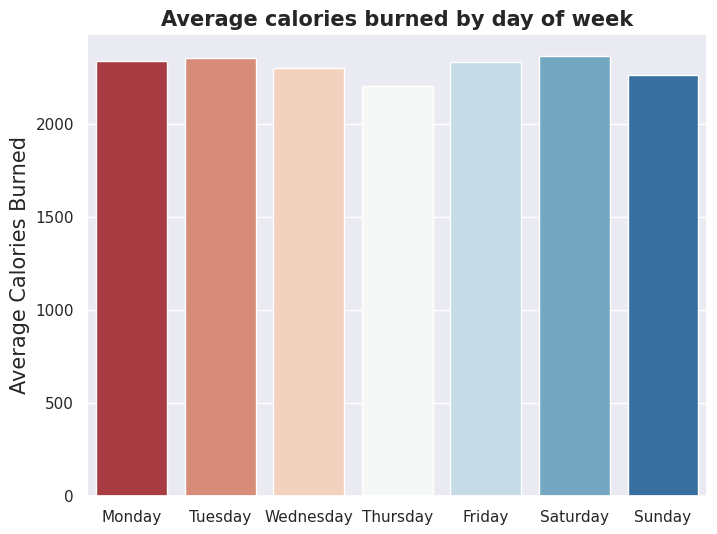

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.set_context("notebook")
ax = sns.barplot(data=avg_calories_dow, x="DayOfWeek", y="Calories", ci=None, palette="RdBu")
plt.title("Average calories burned by day of week", fontsize=15, fontweight="bold")
plt.xlabel("")
plt.ylabel("Average Calories Burned", fontsize=15)
plt.xticks(rotation="45")

ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()


The calories burn is observed to begin increasing again at 4pm while reaching its peak at 6pm indicating that users could likely be choosing to work out or commute after work/school hours. A significant decrease is also observed from 7-8pm and continues to gradually decrease which suggest that users are possibly winding down to be ready for their bedtime.

### 5.5 Average calories burned hourly

In [ ]:
df = hourly_metrics.groupby(hourly_metrics["DateTime"].dt.hour)["Calories"].mean()
print(df)

In [ ]:
fig = px.line(hourly_metrics.groupby(hourly_metrics["DateTime"].dt.hour)["Calories"].mean(),
              title="Average of total calories burned hourly", markers=True, y="Calories")

fig.update_layout(xaxis={'range':[0,23]}, xaxis_title="Time", yaxis_title="Average of total calories Burned")

"plotly express hovertemplate:", fig.data[0].hovertemplate
fig.update_traces(hovertemplate='Time of Day: %{x} <br> Average of Total Calories Burned: %{y}')

fig.show()

The line chart under consideration exhibits a strikingly similar pattern to the average calories line chart presented in Section 5.5. Users tend to initiate their day's activities around 5 am, with a subsequent decline in the number of steps taken after 7 pm. This consistent trend prompts the suggestion of conducting a correlation analysis between the total calories burned and steps taken to ascertain any potential relationship between these two variables. Exploring this correlation could reveal insights into how physical activity, as indicated by step count, relates to the overall calorie expenditure, providing a more comprehensive understanding of users' fitness behaviors throughout the day.

### 5.6 Total steps by day of week

In [ ]:
steps = daily_activity_sleep.groupby("DayOfWeek")[['TotalSteps']].mean().reindex(days_order)
avg_steps_dow = pd.DataFrame(steps)
avg_steps_dow.reset_index(inplace=True)

display(avg_steps_dow)

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.set_context("notebook")
sns.boxplot(data=daily_activity_sleep, x="DayOfWeek", y="TotalSteps", palette="tab10", sym="", order=days_order)
plt.title("Total steps clocked by day of week", fontsize=15, fontweight="bold")
plt.xlabel("")
plt.ylabel("Total Steps Clocked", fontsize=15)
plt.xticks(rotation="45")

plt.show()

From the scatter plot, we can observe a positive linear relationship between both variables. This indicates that users burned more calories with higher steps taken. To further prove our analysis, we can write a linregress() code to find the R Value (Pearson's Correlation Coefficient) that determine the level of linear regression between both variables.

### 5.7 Average steps taken hourly

In [ ]:
df = hourly_metrics.groupby(hourly_metrics["DateTime"].dt.hour)["TotalSteps"].mean()
print(df)

In [ ]:
fig = px.line(hourly_metrics.groupby(hourly_metrics["DateTime"].dt.hour)["TotalSteps"].mean(),
              title="Average of total steps clocked hourly", markers=True, y="TotalSteps")

fig.update_layout(xaxis={'range':[0,23]}, xaxis_title="Time of Day",
yaxis_title="Average of Total Steps Taken")

print("plotly express hovertemplate:", fig.data[0].hovertemplate)
fig.update_traces(hovertemplate='Time of Day: %{x} <br>Average of Total Steps: %{y}')

fig.show()

As seen from the results, the linear regression have an r value of 0.6 indicating a strong linear relationship between both variables.

linregress() is also a useful function that provides the regression slope value, intercept, p value and standard error of the analysis. For the importance of our analysis, the regression slope measures the steepness of the linear relationship shown by a best fit line. The steeper the line, the higher the effect on change the x variable has on the y variable. In this case, for every 1 step users take, they would expend an average of 0.08 calories. The r value of 0.6 should not be taken as a face value of a strong relationship between both variables as the r value only computes the strength of a linear relationship.

### 5.8 Correlation analysis of calories vs steps

In [ ]:
px.defaults.template = "presentation"
px.defaults.color_continuous_scale = px.colors.qualitative.Antique
px.defaults.width = 800
px.defaults.height = 600

fig = px.scatter(x=daily_activity_sleep["TotalSteps"], y=daily_activity_sleep["Calories"],
                 title=" Correlation betwen Total Steps and Calories",

labels=dict(x="Total Steps",y="Calories"))

fig.update_layout(
    xaxis={
        'range':[0,32000]
          })

fig.show()

From the scatter plot, we can observe a positive linear relationship between both variables. This indicates that users burned more calories with higher steps taken. To further prove our analysis, we can write a linregress() code to find the R Value (Pearson's Correlation Coefficient) that determine the level of linear regression between both variables.

In [ ]:
from scipy.stats import linregress
xs = daily_activity_sleep["TotalSteps"]
ys = daily_activity_sleep["Calories"]

res = linregress(xs,ys)
print(res)

As seen from the results, the linear regression have an r value of 0.6 indicating a strong linear relationship between both variables.

linregress() is also a useful function that provides the regression slope value, intercept, p value and standard error of the analysis. For the importance of our analysis, the regression slope measures the steepness of the linear relationship shown by a best fit line. The steeper the line, the higher the effect on change the x variable has on the y variable. In this case, for every 1 step users take, they would expend an average of 0.08 calories. The r value of 0.6 should not be taken as a face value of a strong relationship between both variables as the r value only computes the strength of a linear relationship.

### 5.9 Activity level by distance

In [ ]:
# Mean of active distance level
activity_level_dist = daily_activity_sleep[['SedentaryActiveDistance','LightActiveDistance',
                                            'ModeratelyActiveDistance','VeryActiveDistance']].mean()

# covert into pandas dataframe
active_distance = pd.DataFrame(activity_level_dist)
active_distance.reset_index(inplace=True)
active_distance = active_distance .rename(columns = {'index':'ActiveDistanceLevel', 0:'AverageActiveDistance'})

active_distance.head()

In [ ]:
activity_level_dist = pd.DataFrame(data = daily_activity_sleep,
columns = ['SedentaryActiveDistance','LightActiveDistance','ModeratelyActiveDistance', 'VeryActiveDistance'])

sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
sns.set_context("notebook")

ax = sns.barplot(x="variable", y="value", data=pd.melt(activity_level_dist), ci=None, palette="dark")
ax.set(xlabel="",ylabel="Average Distance")
plt.title("Average Distance of Activity Levels",fontsize=20)
plt.xticks(rotation=45)

ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%f' % float(p.get_height()),
            fontsize=14, color='black', ha='center', va='bottom')
plt.show()

This barchart depicts the average distance users clocked in the respective activity levels:
* Sedentary Active Distance
* Lightly Active Distance
* Moderate Active Distance
* Very Active Distance

The highest distance of 3.35km is clocked in the lightly active level. This further reinforce our assumptions in Section 5.2 that users are likely wearing their watches for daily lifestyle activities (e.g walking, doing chores, gardening etc). The second highest distance clocked is at 1.5km in the very active level. Sedentary active clocked the lowest with a distance that is almost insignificant which makes sense as users are most likely inactive and not moving.

### 5.10 Average time of sleep activity

In [ ]:
daily_activity_sleep['AwakeTimeInbed'] = daily_activity_sleep['TotalTimeInBed'] - daily_activity_sleep['TotalMinutesAsleep']

days_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sleep = daily_activity_sleep.groupby("DayOfWeek")[['TotalTimeInBed',
'TotalMinutesAsleep',
'AwakeTimeInbed']].mean().reindex(days_order)

sleep_dow = pd.DataFrame(sleep)
sleep_dow.reset_index(inplace=True)

display(sleep_dow)

In [ ]:
sleep_dow.plot(x="DayOfWeek", kind="bar", figsize=(12,6), ylabel="Average of Total Mins")
plt.title("Average Time of Sleep Activity", fontsize=20, fontweight="bold")
plt.xlabel("")
plt.ylabel("Average of Total Mins", fontsize=15)

plt.show()

It is calculated that users have a mean sleep schedule of **419.5 minutes(~7hrs)** that is consistent across the week and within the healthy range. The highest recorded mean time asleep was on Sundays (~ 7.5hrs) and the lowest was on Thursdays (~ 6.7 hrs).

Comparing this chart with section 5.6 (Total steps by day of week), we understand that the lowest total steps on average was also recorded on Sunday. This reinforces our assumption that Sundays are likely a rest day for users.

### 5.11 Proportion of users with adequate sleep

In [ ]:
# Categorizing users based on their amount of sleep
def sleep_grp_if(TotalMinutesAsleep):
    if (TotalMinutesAsleep > 420) :
        return 'Adequate Sleep'
    else:
        return 'Inadequate Sleep'

sleep_grp = sleep_day.loc[:,("Id", "Date", "TotalMinutesAsleep")]
sleep_grp['sleep_grp_if'] = sleep_grp['TotalMinutesAsleep'].apply(sleep_grp_if)
sleep_grp.head()

In [ ]:
# Identifying the number of users for each sleep category
sleep_proportion = sleep_grp['sleep_grp_if'].value_counts()
print(sleep_proportion)

In [ ]:
#Plotting the piechart
fig = px.pie(sleep_grp, values=sleep_proportion, names=sleep_proportion, title = "Proportion of users by sleep adequacy")

fig.update_traces(textposition="inside", labels=["Adequate Sleep","Inadequate Sleep"])

fig.show()

The piechart generated shows a generally balanced proportion of users with adequate and inadequate sleep. However, I believe there could be intiatives to encourage more users to get at least 7 hours of sleep.

### 5.12 Distribution of users sleep hours

In [ ]:
# Categorizing users based on sleep hours
def sleep_grp_hrs(TotalMinutesAsleep):
    if (TotalMinutesAsleep <= 420) :
        return 'Less than 7hrs'
    elif (TotalMinutesAsleep <=540):
        return '7hrs to 9hrs'
    else:
        return 'More than 9hrs'

sleep_distribution = sleep_day.loc[:,("Id", "Date", "TotalMinutesAsleep")]
sleep_distribution['sleep_grp_hrs'] = sleep_distribution['TotalMinutesAsleep'].apply(sleep_grp_hrs)
sleep_distribution.head()

In [ ]:
sleep_proportion = sleep_distribution['sleep_grp_hrs'].value_counts()
print(sleep_proportion)

In [ ]:
X1 = sleep_distribution.loc[sleep_distribution.sleep_grp_hrs == 'Less than 7hrs','TotalMinutesAsleep']
X2 = sleep_distribution.loc[sleep_distribution.sleep_grp_hrs == '7hrs to 9hrs','TotalMinutesAsleep']
X3 = sleep_distribution.loc[sleep_distribution.sleep_grp_hrs == 'More than 9hrs','TotalMinutesAsleep']

kwargs = dict(alpha=0.7, bins=20)

plt.figure(figsize=(14,8))
plt.hist(X1, **kwargs, color='r', label='Less than 7hrs', edgecolor='k')
plt.hist(X2, **kwargs, color='g', label='7hrs to 9hrs', edgecolor='k')
plt.hist(X3, **kwargs, color='b', label='More than 9hrs', edgecolor='k')
plt.title('Distribution of Users Sleep Hours', fontsize=20, fontweight="bold")
plt.xlabel('Sleep Time (Minutes)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

plt.legend()

plt.show()

Here, we breakdown the various sleep hours in a normal distribution curve, showing that majority of users get approximately **340 - 540 minutes (5.6hrs-9hrs)** of sleep.

### 5.13 Correlation matrix of daily activities

In [ ]:
# Creating a dataframe containing correlation coefficients of variables in daily_activity_sleep
total_corr = daily_activity_sleep[["TotalSteps", "TotalDistance", "TrackerDistance", "LoggedActivitiesDistance","VeryActiveDistance", "ModeratelyActiveDistance", "LightActiveDistance", "SedentaryActiveDistance", "VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes", "TotalMinutesAsleep", "TotalTimeInBed", "Calories"]].corr()

# plotting the heatmap
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(total_corr, annot=True, fmt = '.2f', cmap="viridis")
plt.title("Correlation Heatmap of daily_activity dataset", fontsize = 25)

plt.show()

Finally, we ran a correlation heatmap to provide us an overview on the correlation levels across the variables within the `daily_activity_sleep` dataframe. Some of the relevant variables pairs identified with strong correlation (R > 0.6) are:
* `TotalDistance` and `Calories`
* `VeryActiveDistance` and `VeryActiveMinutes`
* `LightlyActiveMinutes` and `LightActiveDistance`
* `FairlyActiveMinutes` and `ModeratelyActiveDistance`
* `VeryActiveMinutes` and `VeryActiveDistance`
* (`TotalSteps`, `TotalDistance`, `TrackerDistance`) and `VeryActiveDistance`

In [ ]:
weightloginfo = pd.read_csv("/kaggle/input/weight/weightLogInfo_merged.csv")


In [ ]:
print('\033[1m' + 'daily_activity' + '\033[0m')
display(weightloginfo.head(5))

In [ ]:
weightloginfo.isnull().sum().sum()

In [ ]:
weightloginfo.info()

In [ ]:
weightloginfo.describe()

In [ ]:
weightloginfo[weightloginfo["Fat"].isnull()]

In [ ]:
df = weightloginfo.fillna(weightloginfo.mean(), inplace=True)

In [ ]:

weightloginfo['Date'] = pd.to_datetime(weightloginfo['Date'], format='%m/%d/%Y %I:%M:%S %p')
weightloginfo['Date'] = weightloginfo['Date'].dt.date
weightloginfo['Time'] = weightloginfo['Date'].apply(lambda x: pd.to_datetime(x).time())
weightloginfo.head()


In [ ]:
weightloginfo.drop(columns=['Time'], inplace=True)
weightloginfo.head()

In [ ]:
weightloginfo[weightloginfo.duplicated()]

In [ ]:
weightloginfo.dtypes

In [ ]:
weightloginfo["Date"] = pd.to_datetime(weightloginfo["Date"], format="%Y-%m-%d")


In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(weightloginfo['WeightKg'], bins=20, kde=True)
plt.title('Distribution of WeightKg')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=weightloginfo[['WeightKg', 'WeightPounds', 'Fat', 'BMI']])
plt.title('Boxplots of Numerical Variables')
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='IsManualReport', data=weightloginfo)
plt.title('Count of Manual and Automated Reports')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = weightloginfo[['WeightKg', 'WeightPounds', 'Fat', 'BMI']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
heart_rate = pd.read_csv("/kaggle/input/heartrate/heartrate_seconds_merged.csv")

In [ ]:
print('\033[1m' + 'Heart Rate' + '\033[0m')
display(heart_rate.head(5))

In [ ]:
heart_rate.isnull().sum()

In [ ]:
heart_rate.duplicated().sum()

In [ ]:
heart_rate['Time'] = pd.to_datetime(heart_rate['Time'], errors='coerce')

In [ ]:
heart_rate.dtypes

In [ ]:
heart_rate['Time'] = heart_rate['Time'].dt.time

In [ ]:
print('\033[1m' + 'Heart Rate' + '\033[0m')
display(heart_rate.head(5))

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(heart_rate['Value'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Heart Rate Values')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()


In [ ]:

plt.figure(figsize=(8, 5))
sns.boxplot(x=heart_rate['Value'], color='lightgreen')
plt.title('Box Plot of Heart Rate Values')
plt.xlabel('Heart Rate')
plt.show()



# <span style="color:#DD3E02"> 6. Act Phase </span>
### 6.1 Key Insights

1. In terms of physical activities on a daily basis, Users spent the most time (~ 3.2hrs) and highest distance (3.35km) in the lightly active level.

2. Although users spent 21 minutes on average in the Very Active category, 81% of their day is spent being sedentary which highlights a concern.

3. The average user burns 2307 calories and clocks 7652 steps per day.

4. Users seem to burned a consistent amount of calories throughout the week with the highest burned (2365 calories) on Saturdays and lowest (2204 calories) on Thursdays.

5. The average user burn the highest calories between 5pm-7pm.

6. The highest number of steps clocked (8125 steps) are on Tuesdays and the lowest(6993 steps) are on Sundays.

7. The average user begins their day at 5am and clocked the highest number of steps between 5-7pm. They gradually reduce their activeness from 8pm onwards.

8. There is a strong positive linear relationship between total steps clocked and total calories burned.

9. Users have a consistent sleep schedule with a mean sleep hours of 419.5 minutes (~ 7hrs) across the week. The highest recorded mean time asleep was on Sundays (~ 7.5hrs) and the lowest was on Thursdays (~ 6.7 hrs).

10. 44.3% of users have inadequate sleep hours(<7hours).

11. At least 5 relevant pairs of variables are found to have a strong correlation (r >0.6).